In [1]:
include("src/Models.jl")
include("src/Params.jl")
include("src/Utils.jl")
using DifferentialEquations
using StatsPlots; gr()
using Printf
using DataFrames, CSV

Example trajectories

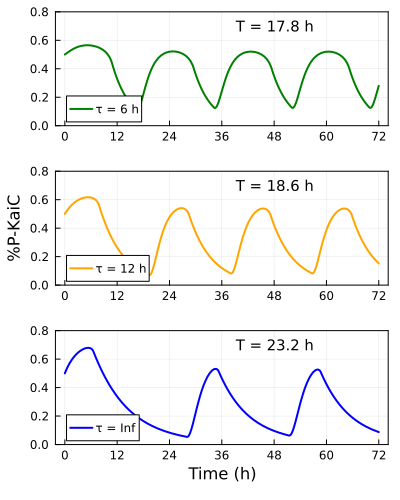

"/home/randolph/Rust_lab/kaiabc/outputs/example_traj_saparate.pdf"

In [11]:
U0 = 3.5
A0 = 1.0
fATP = 1.0
p_rest = [kUTA, kTU, kTUA, kTDA, kDT, kDTA, kDS, kDSA, kSDA, kSU, kSUA, kUSA, kCIhyd,
     KA, A0, fATP, N, M]
TMAX = 72

plot_vec = []
color_vec = (:green, :orange, :blue)
i = 1
for tau in [6, 12, 1e5]
    X0 = [U0*0.5, U0*0.5, 0, 0, 0, 0]    # give 50% pT to match experiment initial condition
    prob = ODEProblem(kaiabc_growing!, X0, (0, TMAX), [p_rest..., tau, U0])
    sol = solve(prob, reltol=1e-8, abstol=1e-8)
    
    p = plot(sol.t, phospho_C(sol.u), label="""τ = $(tau < 1e4 ? (@sprintf "%d h" tau) : "Inf")""",
        linewidth=2, leg=:bottomleft, color=color_vec[i], frame=:box)
    # Estimate the period
    _, _, per, _ = attracted_to(kaiabc_growing!, X0, 500, [p_rest..., tau, U0])
    annotate!(p, [48], [0.7], [("""T = $(@sprintf "%.1f" per) h""", 10)])
    if i == 1
        xlabel!(p, "")
        ylabel!(p, "")
    elseif i == 2
        xlabel!(p, "")
        ylabel!(p, "%P-KaiC")
    else
        xlabel!(p, "Time (h)")
        ylabel!(p, "")
    end
    xticks!(p, 0:12:72)
    ylims!(p, (0, 0.8))
    push!(plot_vec, p)

    i += 1
end

plot(plot_vec..., layout=(3,1), size=(400, 500)) |> display
savefig("outputs/example_traj_saparate.pdf")

Experimental data

In [13]:
# read
df = CSV.read("data/quantification_0_6_12h.csv", DataFrame)
df_long = stack(df, Not([:time]), [:time], variable_name="τ", value_name="ratio_P");

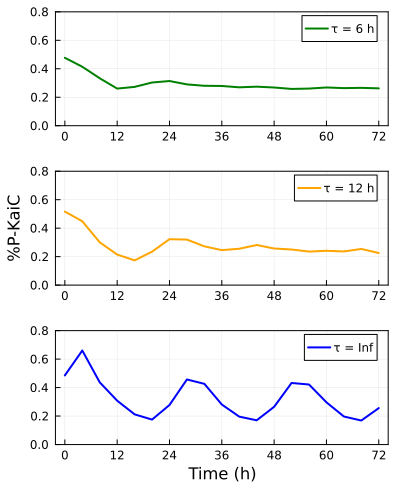

"/home/randolph/Rust_lab/kaiabc/outputs/experiment_traj_saparate.pdf"

In [15]:
color_vec = [:green :orange :blue]
p = @df df_long plot(:time, :ratio_P, group=:τ, layout=(3, 1), size=(400, 500), 
    frame=:box, color=color_vec, linewidth=2, leg=:topright,
    label=map(lab->"τ = $lab", ["6 h" "12 h" "Inf"]))
xticks!(p, 0:12:72)
ylims!(p, (0, 0.8))
xlabel!(p[3], "Time (h)")
ylabel!(p[2], "%P-KaiC")
display(p)
savefig("outputs/experiment_traj_saparate.pdf")